In [1]:
# import the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
# import the data
df = pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

we can see that there are no null values in our dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


We can see that we one column who has categorical value, we will convert the categorical values into numerical values with the help of labelencoder.

In [6]:
le = LabelEncoder()

In [7]:
df['Gender'] = le.fit_transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


We can see that we have a user id column which is not of much importance so we will remove that column.

In [8]:
df.drop(['User ID'], axis=1, inplace=True)

In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


We can see that the data in our independent variables has a very high difference in values, which can affect our model, so we will scale the data using standard scaler.

In [10]:
sc = StandardScaler()

In [11]:
df.iloc[:,:3]  = sc.fit_transform(df.iloc[:,:3])
df

,Gender,Age,EstimatedSalary,Purchased
0,1.020204,-1.781797,-1.490046,0
1,1.020204,-0.253587,-1.460681,0
2,-0.980196,-1.113206,-0.785290,0
3,-0.980196,-1.017692,-0.374182,0
4,1.020204,-1.781797,0.183751,0
...,...,...,...,...
395,-0.980196,0.797057,-0.844019,1
396,1.020204,1.274623,-1.372587,1
397,-0.980196,1.179110,-1.460681,1
398,1.020204,-0.158074,-1.078938,0


Now we will divide the data into Dependent and independent varaibles.

In [12]:
X = df.drop(['Purchased'], axis=1)
X

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751
...,...,...,...
395,-0.980196,0.797057,-0.844019
396,1.020204,1.274623,-1.372587
397,-0.980196,1.179110,-1.460681
398,1.020204,-0.158074,-1.078938


In [13]:
Y = df['Purchased']
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

We will now divide our data into training and testing data.

In [14]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=99)

In [15]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((280, 3), (120, 3), (280,), (120,))

In [16]:
dt =  DecisionTreeClassifier()

In [17]:
dt.fit(train_x, train_y)

DecisionTreeClassifier()

Now we will check the feature importance of our data.

In [18]:
features = pd.DataFrame({'Features' : train_x.columns, 'Importance' : dt.feature_importances_})
features.sort_values('Importance', ascending=False)

,Features,Importance
1,Age,0.517947
2,EstimatedSalary,0.463196
0,Gender,0.018857


Here we can see that Gender is not of much importance, so we can remove it, i will not remove it as of now.

In [19]:
y_pred = dt.predict(test_x)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [20]:
results = pd.DataFrame({'Actual' : test_y, 'Predicted' : y_pred})
results

,Actual,Predicted
61,0,0
348,0,0
163,0,0
7,1,1
275,1,1
...,...,...
259,1,0
241,0,0
106,0,0
200,0,0


In [21]:
accuracy_score(test_y,y_pred)

0.8833333333333333

In [22]:
confusion_matrix(test_y,y_pred)

array([[76,  7],
       [ 7, 30]])

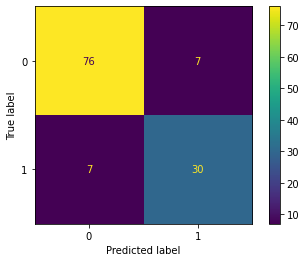

In [23]:
plot_confusion_matrix(dt, test_x, test_y)

Now we will visualize our decision tree.

[Text(583.0384615384615, 778.3363636363636, 'Age <= 0.654\ngini = 0.471\nsamples = 280\nvalue = [174, 106]\nclass = 0'),
 Text(379.1538461538462, 704.209090909091, 'EstimatedSalary <= 0.61\ngini = 0.275\nsamples = 194\nvalue = [162, 32]\nclass = 0'),
 Text(186.0, 630.0818181818181, 'Age <= -0.11\ngini = 0.071\nsamples = 162\nvalue = [156, 6]\nclass = 0'),
 Text(157.3846153846154, 555.9545454545455, 'gini = 0.0\nsamples = 112\nvalue = [112, 0]\nclass = 0'),
 Text(214.6153846153846, 555.9545454545455, 'EstimatedSalary <= 0.404\ngini = 0.211\nsamples = 50\nvalue = [44, 6]\nclass = 0'),
 Text(186.0, 481.8272727272727, 'EstimatedSalary <= 0.14\ngini = 0.153\nsamples = 48\nvalue = [44, 4]\nclass = 0'),
 Text(85.84615384615385, 407.7, 'Age <= -0.015\ngini = 0.056\nsamples = 35\nvalue = [34, 1]\nclass = 0'),
 Text(57.23076923076923, 333.57272727272726, 'EstimatedSalary <= -0.183\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(28.615384615384617, 259.4454545454545, 'gini = 0.0\ns

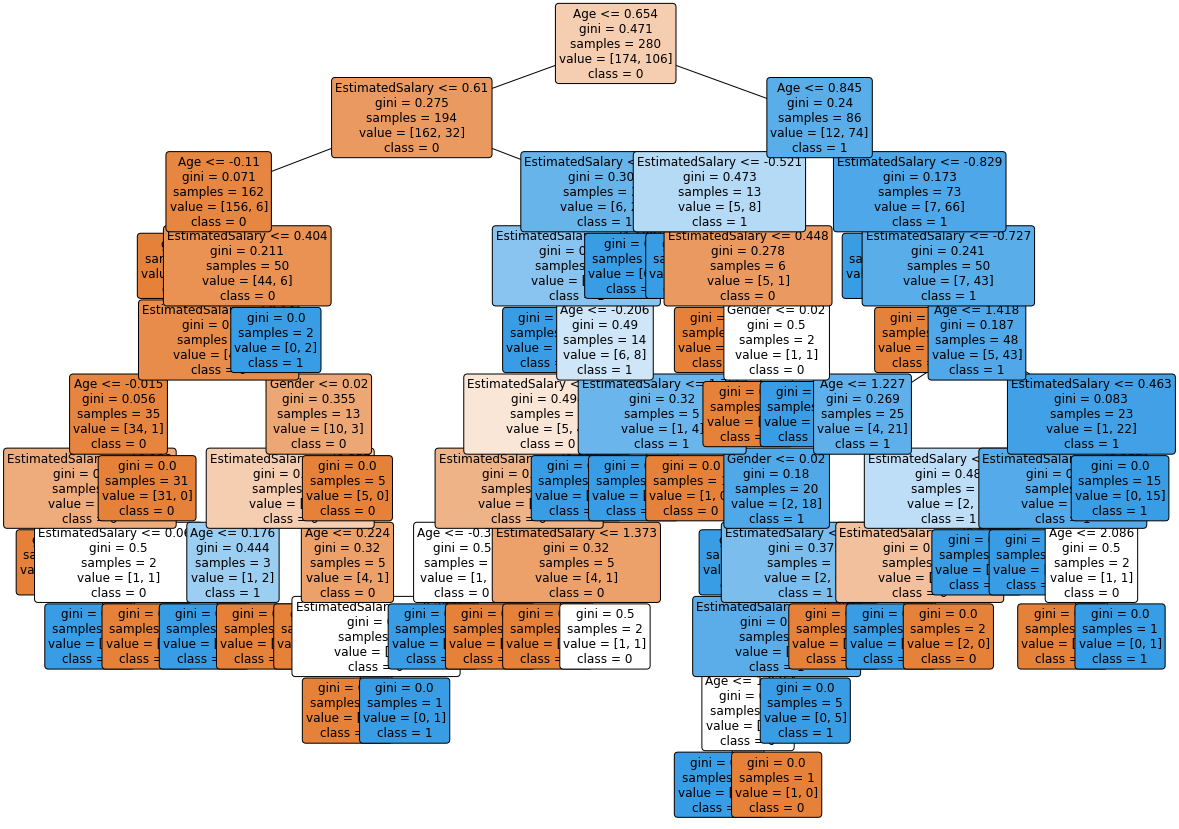

In [24]:
plt.figure(figsize=(20,15))

tree.plot_tree(dt,class_names=['0','1'],feature_names=train_x.columns, filled=True,rounded=True,fontsize=12)